In [12]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

### Generating Dataset

In [13]:
X, Y = make_classification(n_classes=2, n_clusters_per_class=1, random_state=3, n_samples=400, n_features=2, n_informative=2, n_redundant=0)

In [14]:
## Converting Y Labels into positve and negative class [-1,1]
Y[Y==0] = -1

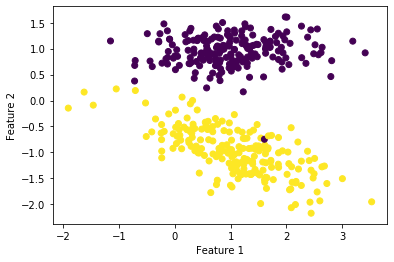

In [15]:
## Visualizing the Dataset
plt.scatter(X[:,0],X[:,1],c=Y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [16]:
class SVM:
    
    ## Initializing the constructor
    def __init__(self, C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    ## Loss function (L = 0.5*W*W.T + C*max(0, 1-ti))    
    def hingeLoss(self, X, Y, W, b):
        
        loss = 0.0
        loss = loss + (0.5*np.dot(W,W.T))
        m = X.shape[0]
        
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T) + b)
            loss = loss + self.C*max(0, (1-ti))
        
        return loss[0][0]
    
    ## Training and fitting with Batch Gradient Descent
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, max_iter=400):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        ## Initializing the weight vector and bias
        W = np.zeros((1,no_of_features))
        b = 0
        
        losses = []
        ## Training Loop
        for k in range(max_iter):
            
            l = self.hingeLoss(X, Y, W, b)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            ## Pegasos Implementation - Batch Gradient Descent with Random Shuffling
            for batch_start in range(0, no_of_samples, batch_size):
                grad_w = 0
                grad_b = 0
                for j in range(batch_start, batch_start+batch_size):
                    i = ids[j]
                    ti = Y[i]*(np.dot(W, X[i].T) + b)
                    
                    ## Case 1 : No error
                    if ti>1:
                        grad_w += 0
                        grad_b += 0
                    ## Case 2 : Error
                    else:
                        grad_w += self.C*Y[i]*X[i]
                        grad_b += self.C*Y[i]
                
                ## Update Rule
                W = W - learning_rate*W + learning_rate*grad_w
                b = b + learning_rate*grad_b
                
        self.W = W
        self.b = b
        return W, b, losses

In [18]:
mySVM1 = SVM(C=100)
W,b,losses = mySVM1.fit(X,Y,max_iter=100)

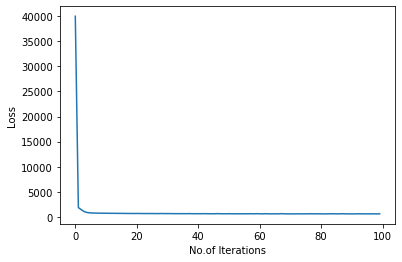

In [19]:
## Error Plot
plt.plot(losses)
plt.xlabel('No.of Iterations')
plt.ylabel('Loss')
plt.show()

In [20]:
print(W, b)

[[-1.39760729 -5.00250744]] 1.2000000000000002


In [21]:
def plotHyperplane(w1, w2, b, c):
    plt.figure(figsize=(12,12))
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    
    x1 = np.linspace(-2,4,10)
    x2 = -(w1*x1 + b)/w2
    p1 = -(w1*x1 + b + 1)/w2
    p2 = -(w1*x1 + b - 1)/w2
    
    plt.plot(x1, x2, label="Hyperplane WX+B=0")
    plt.plot(x1, p1, label="+ve Hyperplane WX+B=1")
    plt.plot(x1, p2, label="-ve Hyperplane WX+B=-1")
    
    plt.legend()
    plt.plot(x1,p1)
    plt.plot(x1,p2)
    plt.title('C = '+str(c))
    plt.show()

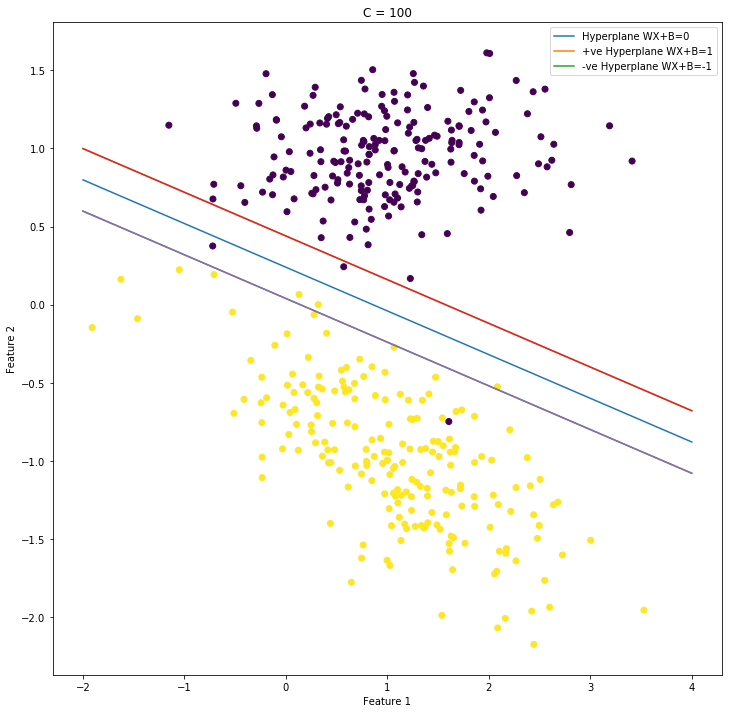

In [22]:
plotHyperplane(W[0,0], W[0,1], b, mySVM1.C)

In [23]:
mySVM2 = SVM(C=1000)
W,b,losses = mySVM2.fit(X,Y,max_iter=100)

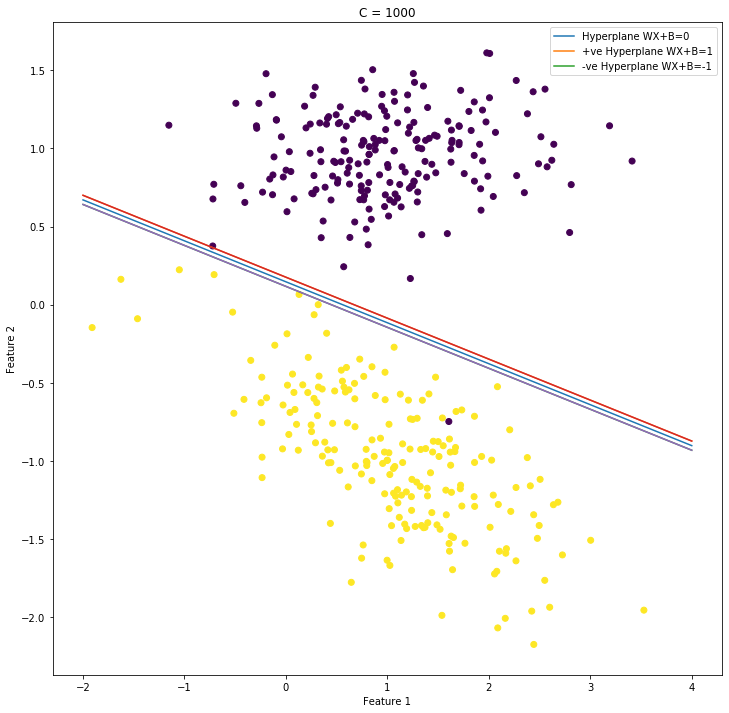

In [24]:
plotHyperplane(W[0,0], W[0,1], b, mySVM2.C)

# Non-Linear Classification
Classification of data that is not linearly separable - This can be done by transforming the data to higher dimensions so that it can become linearly separable.

In [25]:
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [62]:
## Generating data in circles which is not linearly separable

X_n, Y_n = make_circles(n_samples=500, noise=0.02)
print(X_n.shape, Y_n.shape)

(500, 2) (500,)


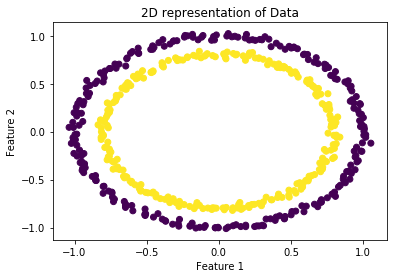

In [63]:
plt.scatter(X_n[:,0], X_n[:,1],c=Y_n)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D representation of Data')
plt.show()

In [64]:
## Function to transform data to a higher-dimensional space

def phi(X_n):
    X1 = X_n[:,0]
    X2 = X_n[:,1]
    X3 = X1**2 + X2**2
    
    X_ = np.zeros((X_n.shape[0], 3)) ## New matrix with transformation in the 3rd column
    X_[:,:-1] = X_n
    X_[:,-1] = X3
    
    return X_

In [65]:
X_ = phi(X_n)  ## Transformed feature space
X_.shape

(500, 3)

In [66]:
## 3D plot of the data

def plot3D(X_, show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    X1 = X_[:,0]
    X2 = X_[:,1]
    X3 = X_[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y_n,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax

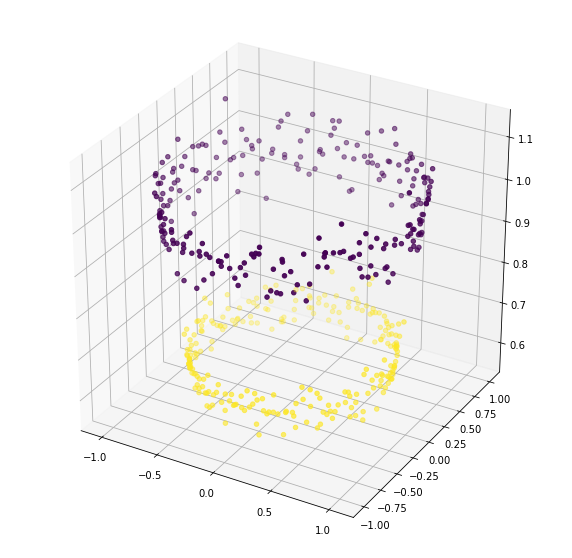

In [67]:
ax = plot3D(X_)

## Classification using Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#### On Original Data - 2D

In [69]:
lr = LogisticRegression()
acc = cross_val_score(lr,X_n,Y_n,cv=5).mean()
print("Accuracy (2D) is %.4f"%(acc*100))

Accuracy (2D) is 46.0000


#### On Higher-Dimensional Data - 3D

In [70]:
lr = LogisticRegression()
acc = cross_val_score(lr,X_,Y_n,cv=5).mean()
print("Accuracy (3D) is %.4f"%(acc*100))

Accuracy (3D) is 100.0000


### Visualizing the Decision Surface

In [71]:
lr.fit(X_, Y_n)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
Wts = lr.coef_
bias = lr.intercept_

In [73]:
## Creating points for the Decision boundary
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [74]:
z = -(Wts[0,0]*xx + Wts[0,1]*yy+bias)/Wts[0,2]

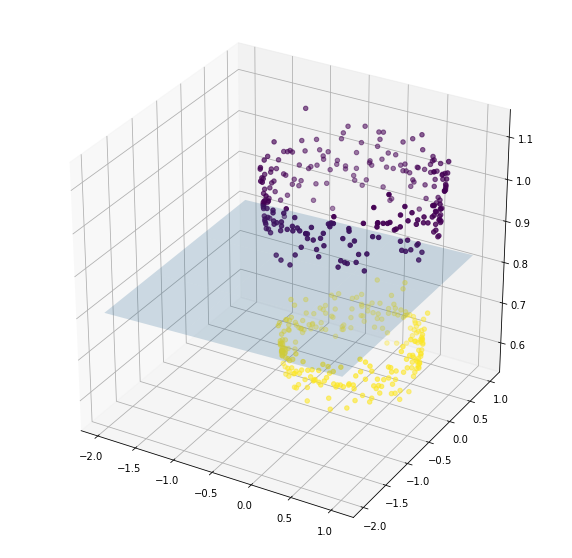

In [75]:
ax = plot3D(X_, False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

# Kernel based Classifications in SVM
**Kernel Trick** is the method of using a linear classifier to solve a non-linear problem. It transforms the linearly in-separable data to linearly separable data using a Kernel function which is computationally feasible.

In [76]:
from sklearn import svm

### Linear Kernel SVM

In [90]:
svc = svm.SVC(kernel='linear')
svc.fit(X_n,Y_n)
acc = svc.score(X_n, Y_n)
print("Accuracy is %.4f"%(acc*100))

Accuracy is 50.8000


### RBF Kernel SVM

In [83]:
svc = svm.SVC(kernel='rbf')
svc.fit(X_n,Y_n)
acc = svc.score(X_n, Y_n)
print("Accuracy is %.4f"%(acc*100))

Accuracy is 100.0000


### Polynomial Kernel SVM

In [84]:
svc = svm.SVC(kernel='poly')
svc.fit(X_n,Y_n)
acc = svc.score(X_n, Y_n)
print("Accuracy is %.4f"%(acc*100))

Accuracy is 60.2000


### Custom Kernel Function

In [88]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

In [89]:
svc = svm.SVC(kernel=custom_kernel)
svc.fit(X_n,Y_n)
acc = svc.score(X_n, Y_n)
print("Accuracy is %.4f"%(acc*100))

Accuracy is 100.0000
